[[114. 130. 145. ... 119. 129. 137.]
 [ 83. 104. 123. ... 118. 134. 146.]
 [ 68.  88. 109. ... 119. 134. 145.]
 ...
 [ 98. 103. 116. ... 144. 143. 143.]
 [ 94. 104. 120. ... 143. 142. 142.]
 [ 94. 106. 119. ... 142. 141. 140.]]
[[141. 125. 110. ... 136. 126. 118.]
 [172. 151. 132. ... 137. 121. 109.]
 [187. 167. 146. ... 136. 121. 110.]
 ...
 [157. 152. 139. ... 111. 112. 112.]
 [161. 151. 135. ... 112. 113. 113.]
 [161. 149. 136. ... 113. 114. 115.]]


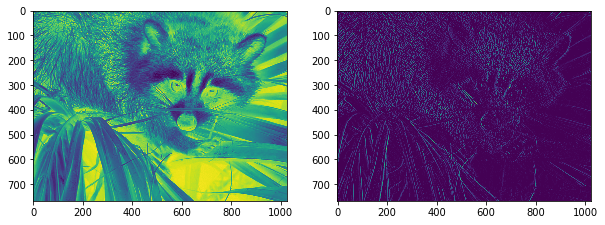

In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage 
import scipy.misc #scikit_image

#흑백이면 0~255 ->반전됨  rgb 가 각각 256개 씩 
img=255-sp.misc.face(gray=True).astype(float) #이미지,동영상
print(sp.misc.face(gray=True).astype(float))

print(255-sp.misc.face(gray=True).astype(float))
#edge detection filter-경계선 검출
k=np.zeros((2,2)) #filters[:,3,:,0]=1   filters 와 같은 의미
                   #filters[3,:,:,1]=1
k[:,0]=1;k[:,1]=-1
#0 0->1, -1
#0 0->1, -1

#convolve 이미지에서 필터, 정보통신 무선신호 복원
img2=np.maximum(0,sp.ndimage.filters.convolve(img,k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

2 427 640 3


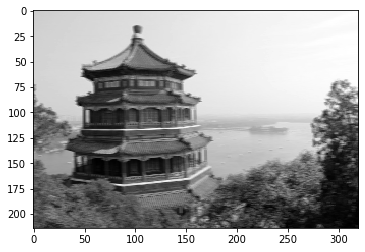

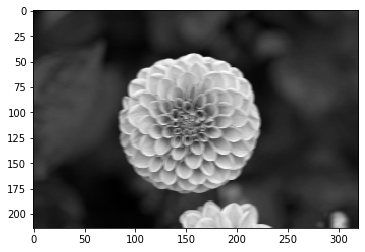

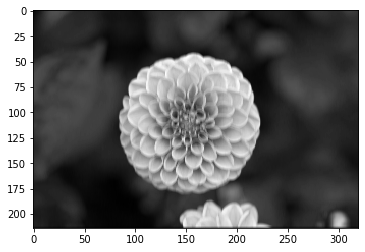

(2, 214, 320, 2)


In [2]:
from sklearn.datasets import load_sample_image
import tensorflow as tf
#heigt,width,channels :3차원 
china=load_sample_image('china.jpg') 
flower=load_sample_image('flower.jpg')
dataset=np.array([china,flower],dtype=np.float32)

#장수,높이 넓이 ,컬러수(RGB)=>컬러는 숫자
batch_size,heigt,width,channels=dataset.shape
print(batch_size,heigt,width,channels) #2(사진이) 427행 640열 3(RGB)개
                                       #           높이,  가로
filters=np.zeros(shape=(7,7,channels,2),dtype=np.float32) #7x7 행렬 , 3개의 채널,


filters[:,3,:,0]=1   # filters 의 shape=(7,7,channels,2) 차례로 행,열,채널,숫자(0,1의 숫자)
filters[3,:,:,1]=1

#주입변수 2,427,640,3 (컬러)=>단색 
X=tf.placeholder(tf.float32,shape=(None,heigt,width,channels)) #그림이 2장이 되었기 때문에,자동 4차원 ,0~1,0~255

#이미지포멧이 결정되어있음 
convolution=tf.nn.conv2d(X,filters, #(2장)
                         strides=[1,1,1,1],padding='SAME')

max_pool=tf.nn.max_pool(convolution,ksize=[1,2,2,1] #2x2 로 줄어듦
                        ,strides=[1,2,2,1],padding='SAME') #strides=[1,2,2,1] 건너뛰기, 줄이는 사이즈가 같아야함

#이미지포멧 결정 427,640
#427,213.5=>214
#VALID :421x634, 7x7
######################################graph (node+edge) 를 만듦
with tf.Session() as sess:
    output=sess.run(max_pool,feed_dict={X:dataset})
plt.imshow(output[0,:,:,1],cmap='gray')
plt.show()
plt.imshow(output[1,:,:,1],cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0],cmap='gray')
plt.show()
type(output)
print(output.shape)
                         
#필터가 2개 이므로 채널이 2개로 

In [3]:
filters=np.zeros(shape=(7,7,3,2),dtype=np.float32)
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [4]:
def plot_image(image):
    plt.imshow(image,cmap='gray',interpolation='nearest')
    plt.axis('off')
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation='nearest')
    plt.axis('off')

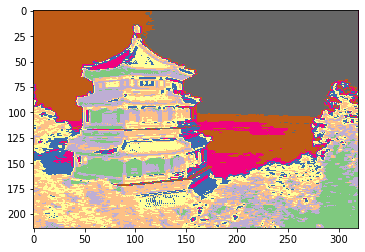

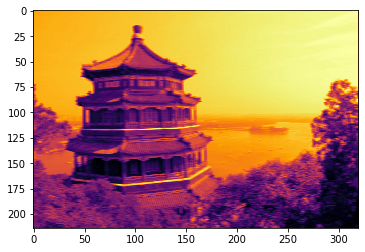

In [5]:
plt.imshow(output[0,:,:,1],cmap='Accent')
plt.show()
plt.imshow(output[0,:,:,1],cmap='inferno')
plt.show()


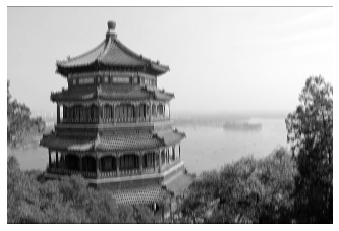

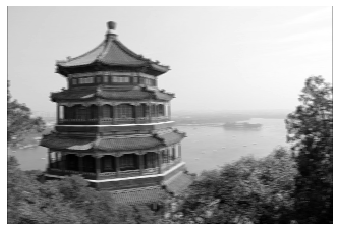

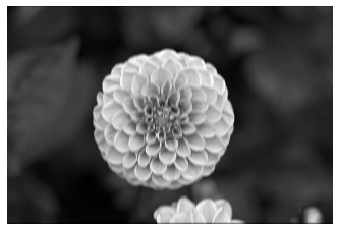

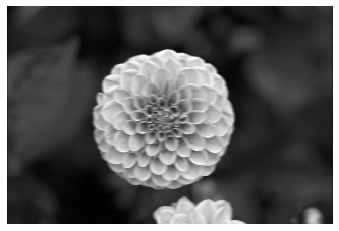

In [6]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index,:,:,feature_map_index])
        plt.show()

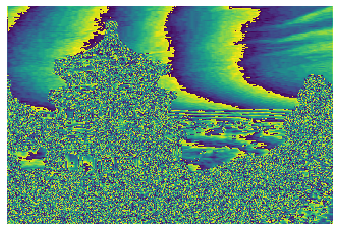

In [7]:
plot_color_image(output[0,:,:,1])

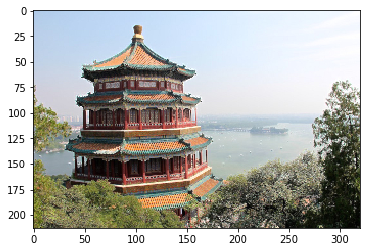

In [8]:
#max pooling 된 결과를 이미지를 출력하시오
#conv2d 채널 1개로 생성
#pooling 은 채널을 그대로 남겨둠 
max_pool=tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
with tf.Session() as sess:
    output=sess.run(max_pool,feed_dict={X:dataset})
plt.imshow(output[0].astype(np.uint8)) #unsigned int 형 (양수)
plt.show()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


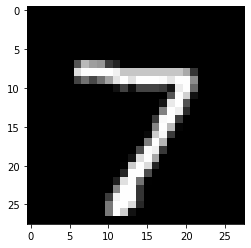

In [9]:
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

first_image=mnist.test.images[0]
pixels=first_image.reshape((28,28))
plt.imshow(pixels,cmap='gray')
plt.show()

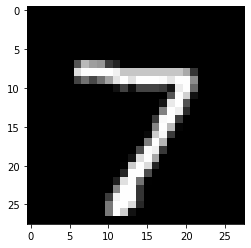

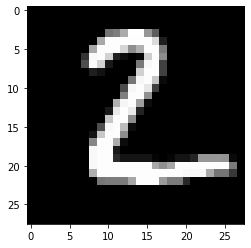

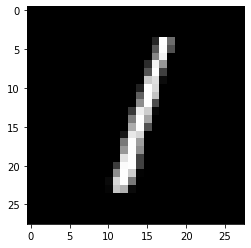

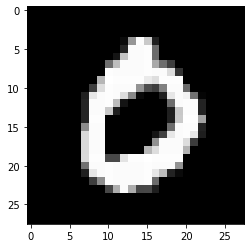

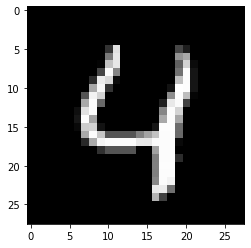

In [10]:
#5장의 이미지를 출력
first_image=mnist.test.images[0:5]
#first_image=np.array(first_image,dtype='float')
for i in range(5):
    pixels=first_image[i].reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    plt.show()

In [37]:
learning_rate=0.001 #optimizer 에서 사용
num_steps=500       #epoch
batch_size=128      #mini batch size 
display_step=10     #시각화

num_input=784      #이미지 28x28 => fully-connected(한 줄로 만들었다 차원수=변수가 784)
num_classes=10     #one hot encoding 0~9 까지의 이미지,10개로 
dropout=0.75       #과적합 방지를 위해 임의적으로 25% 계산 안함 random (임의적으로 진행)

X=tf.placeholder(tf.float32,[None, num_input],name='input') #훈련, 알고 싶은 것에 이름을 달아주면 된다
Y=tf.placeholder(tf.float32,[None, num_classes],name='output') #종속변수
keep_prob=tf.placeholder(tf.float32,name='keep')



In [38]:
#1번이상반복되면 함수화 
#activation function 은 마지막에 한번 호출: 회귀 또는 분류 를 정함
#multi-layer :xor 문제 해결은 activation function 함수를 이용해서 비선형해결해야
#cnn 은 deep할 수록 결과가 좋음
def conv2d(x,W,b,strides=1):
    #가중치:filter 
    x=tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='SAME')
    x=tf.nn.bias_add(x,b) #비선형 맵핑
    return tf.nn.relu(x)
def maxpool2d(x,k=2):
    return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME') #max ,avg



In [39]:
#layer 쌓기
def conv_net(x,weights,biases,dropout):  #128(batch_size)x784
    x=tf.reshape(x,shape=[-1,28,28,1])  #원래 이미지 형태로 바꿈 
                                                 #128x28x28x1 - 필터 32개로(곱하기, 가중치) 출력되는데 이유: 각기 다른 특징을 가지고 있기때문
    conv1=conv2d(x,weights['wc1'],biases['bc1']) #128x28x28x32
    conv1=maxpool2d(conv1,k=2)                   #128x14x14x32 (특징은 줄어들지 않음, 사이즈만 줄여줌)
    conv2=conv2d(conv1,weights['wc2'],biases['bc2']) #128x14x14x64
    conv2=maxpool2d(conv2,k=2)                   #128x7x7x64
    
    #CNN 특징 추출 =>FFNN :feed forward neural network
    fc1=tf.reshape(conv2,                       #7*7*64(as_list()[0]),1024  #fully-connected(한 줄로 만들었다)
                   [-1,weights['wd1'].get_shape().as_list()[0]])
    #7*7*64, 1024=>128x1024
    fc1=tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    fc1=tf.nn.relu(fc1)
    fc1=tf.nn.dropout(fc1,dropout) #25% 계산을 버림 hyper parameter 
    #128 (x 7*7*64, 곱하면 7*7*64x1024), 1024 x 10=>128x 10     
    out=tf.add(tf.matmul(fc1,weights['out']),biases['out'])
    return out




In [40]:
weights={
    'wc1':tf.Variable(tf.random_normal([5,5,1,32])),
    'wc2':tf.Variable(tf.random_normal([5,5,32,64])),
    'wd1':tf.Variable(tf.random_normal([7*7*64,1024])),
    'out':tf.Variable(tf.random_normal([1024,num_classes]))
       }
biases={
    'bc1':tf.Variable(tf.random_normal([32])),
    'bc2':tf.Variable(tf.random_normal([64])),
    'bd1':tf.Variable(tf.random_normal([1024])),
    'out':tf.Variable(tf.random_normal([num_classes]))
}




In [42]:
#저장할때
saver=tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_steps+1):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x,Y:batch_y,keep_prob:dropout})
        if step % display_step==0 or step==1:
            loss,acc=sess.run([loss_op,accuracy],feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
            print('step'+ str(step)+ ',minibatch loss=' + '{:.4f}'.format(loss) + ',traning accuracy=' + '{:.3f}'.format(acc))
    #저장할때 쓰는 포멧        
    save_path=saver.save(sess,'data/cnn_model.ckpt')     
    print('testing accuracy',sess.run(accuracy,feed_dict={X:mnist.test.images[:256],Y:mnist.test.labels[:256],keep_prob:1.0}))
    print('예측:',sess.run(tf.argmax(prediction,1),feed_dict={X:mnist.test.images[100:120],Y:mnist.test.labels[100:120],keep_prob:1.0}))
    
#문제 테스트데이터 100번부터 20개의 데이터를 예측해 보시오
#-예측된 데이터를 출력해보시오
#prediction=tf.nn.softmax(logits) #20X10 를 호출하면됌

ValueError: At least two variables have the same name: Variable

In [45]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph("data/cnn_model.ckpt.meta")
new_saver.restore(sess, "data/cnn_model.ckpt")
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0") # :0 : 장치번호
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(accuracy, feed_dict={Xi:mnist.test.images[:256], Yi:mnist.test.labels[:256], keep:1.0})
print(result)



OSError: File data/cnn_model.ckpt.meta does not exist.

In [ ]:
#문제 :저장된 모델을 로딩한 다음 테스트 데이터100번부터 20개의 데이터를 예측하여 출력하고 정확도를 출력하시오
#print('예측:',sess.run(tf.argmax(prediction,1),feed_dict={X:mnist.test.images[100:120],Y:mnist.test.labels[100:120],keep_prob:1.0}))

In [ ]:
print(result)
pred=sess.run(tf.argmax(prediction,1),feed_dict={X:mnist.test.images[100:120],Y:mnist.test.labels[100:120],keep_prob:1.0})
print(pred)
print(mnist.test.labels[100:120])
result=sess.run(accuracy,feed_dict={X:mnist.test.images[100:120],Y:mnist.test.labels[100:120],keep_prob:1.0})
print(result)

In [ ]:
#########################################다시

In [46]:
learning_rate = 0.001 # Optimizer에서 사용
num_steps = 500       # epoch
batch_size = 128      # mini batch size
display_step = 10     # 시각화

num_input = 784       # 이미지가 28 x 28 = 784(변수개수) => fully-connected되었다.(=전체가 한줄로 되었다.)
num_classes = 10      # one-hot-encoding -> 10장(0~9)의 이미지를 one-hot-encoding방식으로 나타냄
dropout = 0.75        # 과적합을 방지하기 위해서 전체를 계산하지 않고 임의적으로 25%를 계산하지 않는다.(=버림)
                      # random으로 진행

X = tf.placeholder(tf.float32, [None, num_input], name="input")    # 훈련데이터
Y = tf.placeholder(tf.float32, [None, num_classes], name="output") # 종속변수
keep_prob = tf.placeholder(tf.float32, name="keep") # dropout과 관련된 무엇인가...

In [47]:
# Activation function은 마지막에 한번 호출한다. -> 회귀/분류를 구분
# multi-layer : XOR문제해결은 activation 함수를 이용해서 비선형
# CNN은 deep할수록 결과가 좋다.
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding="SAME")
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) # 비선형 mapping

# pooling 방식 : max, avg
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding="SAME")

In [48]:
def conv_net(x, weights, biases, dropout): # 128 x 784
    x = tf.reshape(x, shape=[-1, 28, 28, 1]) # 원래 이미지 형태
    # 128x28x28x1
    conv1 = conv2d(x, weights["wc1"], biases["bc1"]) # conv2d이후 -> 128x28x28x32(32:filter개수)
    conv1 = maxpool2d(conv1, k=2) # maxpool2d이후 -> 128x14x14x32(이미지 크기만 줄어들고, 특징은 줄어들지 않는다.)
    conv2 = conv2d(conv1, weights["wc2"], biases["bc2"])# conv2d이후 -> 128x14x14x64
    conv2 = maxpool2d(conv2, k=2) # maxpool2d이후 -> 128x7x7x64
    
    # 7*7*64, 1024 => fully-connected
    fc1 = tf.reshape(conv2, [-1, weights["wd1"].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights["wd1"]), biases["bd1"])
    # CNN 특징 추출 => FFNN(Feed Forward Neural Network)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout) # 25%의 계산을 버린다. hyper parameter
    
    # 128 x 1024, 1024 x 10 => 128 x 10
    out = tf.add(tf.matmul(fc1, weights["out"]), biases["out"])
    
    return out

In [49]:
weights = {
    "wc1" : tf.Variable(tf.random_normal([5, 5, 1, 32])), # filter size: 5, 5, 1, 32
    "wc2" : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    "wd1" : tf.Variable(tf.random_normal([7*7*64, 1024])),
    "out" : tf.Variable(tf.random_normal([1024, num_classes])),
}
biases = {
    "bc1" : tf.Variable(tf.random_normal([32])),
    "bc2" : tf.Variable(tf.random_normal([64])),
    "bd1" : tf.Variable(tf.random_normal([1024])),
    "out" : tf.Variable(tf.random_normal([num_classes])),
}

logits = conv_net(X, weights, biases, keep_prob) # 128 x 10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()

In [50]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step " + str(step) + ",\tMinibatch Loss= " + "{:.4f}".format(loss)
                  + ",\tTraining Accuracy= " + "{:.3f}".format(acc))
            
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0}))

Step 1,	Minibatch Loss= 42521.5078,	Training Accuracy= 0.164
Step 10,	Minibatch Loss= 14825.9395,	Training Accuracy= 0.406
Step 20,	Minibatch Loss= 6761.4756,	Training Accuracy= 0.656
Step 30,	Minibatch Loss= 6213.1421,	Training Accuracy= 0.727
Step 40,	Minibatch Loss= 3592.5803,	Training Accuracy= 0.750
Step 50,	Minibatch Loss= 2990.4302,	Training Accuracy= 0.781
Step 60,	Minibatch Loss= 3265.9819,	Training Accuracy= 0.812
Step 70,	Minibatch Loss= 2581.9707,	Training Accuracy= 0.898
Step 80,	Minibatch Loss= 2078.1362,	Training Accuracy= 0.875
Step 90,	Minibatch Loss= 1486.6407,	Training Accuracy= 0.922
Step 100,	Minibatch Loss= 717.9341,	Training Accuracy= 0.961
Step 110,	Minibatch Loss= 3177.9419,	Training Accuracy= 0.891
Step 120,	Minibatch Loss= 1902.9863,	Training Accuracy= 0.883
Step 130,	Minibatch Loss= 1117.0916,	Training Accuracy= 0.930
Step 140,	Minibatch Loss= 830.5973,	Training Accuracy= 0.945
Step 150,	Minibatch Loss= 1899.9180,	Training Accuracy= 0.883
Step 160,	Minibatch

In [51]:
# 문제: 테스트 데이터 100번부터 20개의 데이터를 예측하여 보세요.
# - 예측된 데이터를 출력하세요.
logits = conv_net(X, weights, biases, keep_prob) # 128 x 10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name="accuracy")

tf.add_to_collection("accuracy", accuracy)
tf.add_to_collection("Xi", X)
tf.add_to_collection("Yi", Y)
init = tf.global_variables_initializer()

In [52]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step " + str(step) + ",\tMinibatch Loss= " + "{:.4f}".format(loss)
                  + ",\tTraining Accuracy= " + "{:.3f}".format(acc))
            
    save_path = saver.save(sess, "data/cnn_model.ckpt")
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0}))
    print("예측:", sess.run(tf.argmax(prediction, 1), feed_dict={X:mnist.test.images[100:120], Y:mnist.test.labels[100:120], keep_prob:1.0}))

ValueError: At least two variables have the same name: Variable

In [ ]:
저장된 모델을 로딩한 다음 테스트 데이터100번부터 20개의 데이터를 예측하여 출력하고 정확도를 출력하시오

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph("data/cnn_model.ckpt.meta")
new_saver.restore(sess, "data/cnn_model.ckpt")
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0") # :0 : 장치번호
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256], keep_prob:1.0})
print(result)